In [44]:
import numpy as np
import matplotlib.pyplot as plt
import random
from tqdm import tqdm

In [45]:
class RandomWalks:
    def __init__(self):
        self.left = -1
        self.right = 1
        self.true_values = np.arange(-20,22,2)/20
        self.true_values[0] =  self.true_values[-1] = 0
    
    def nstepTD(self, values, n, alpha):
        state = 10
        
        allrewards = [0]
        allstates = [state]
        
        T = float('inf')
        t = 0
        while(True):
            t += 1
            
            if(t < T):
                action = 999
                if(random.random() < 0.5):
                    action = self.left
                else:
                    action = self.right
                
                next_state = state + action
                
                step_reward = 0
                if(next_state == 0):
                    step_reward = -1
                elif(next_state == 20):
                    step_reward = 1
                else:
                    step_reward = 0
                    
                allrewards.append(step_reward)
                allstates.append(next_state)
                
                if(next_state == 0 or next_state == 20):
                    T = t
            tau = t - n
            if(tau >= 0):
                G = 0
                for i in range(tau+1, min(tau+n+1,T+1),1):
                    G += allrewards[i]
                if(tau + n <= T):
                    G += values[allstates[tau + n]]
                
                values[allstates[tau]] += alpha*(G - values[allstates[tau]])
            
            if(tau == T - 1):
                break
            state = next_state
            
    def figure(self):
        steps = np.power(2, np.arange(0,10))
        alphas = np.arange(0,1.1,0.1)
        episodes = 10
        runs = 100
            
        errors = np.zeros((len(steps), len(alphas)))
        
        for run in tqdm(range(runs)):
            for i in range(len(steps)):
                for j in range(len(alphas)):
                    values = np.zeros((21))
                    for e in range(episodes):
                        self.nstepTD(values, steps[i], alphas[j])
                        errors[i, j] += np.sqrt(np.sum(np.power(values - self.true_values, 2))/19)
        errors /= episodes * runs
        
        plt.figure(figsize=(10,10))
        for i in range(len(steps)):
            plt.plot(alphas, errors[i, :], label='n = ' + str(steps[i]))
        plt.legend()

100%|██████████| 100/100 [03:13<00:00,  1.94s/it]


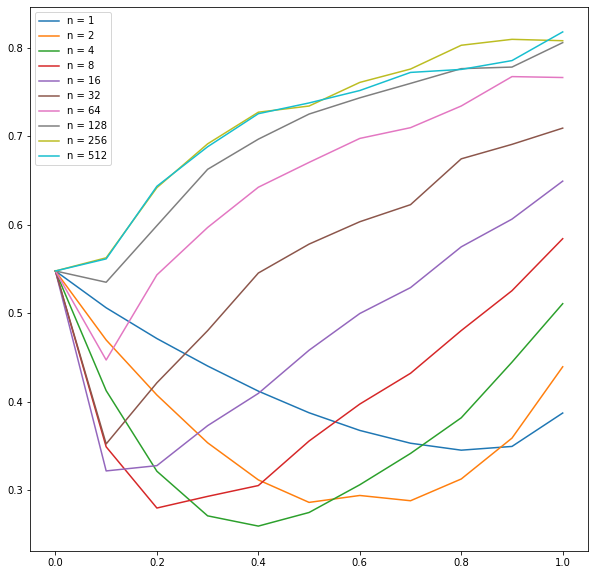

In [46]:
rand = RandomWalks()
rand.figure()